# DATA PREPROCESSING

The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
df=pd.read_csv("Employee.csv")

# DATA EXPLORATION



In [144]:
# Display the basic informations about the dataset and finding the null values
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
None


Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [145]:
# Displaying the fews rows of the dataset
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [146]:
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [147]:
df.describe(include='object')


,Company,Place,Country
count,140,134,148
unique,6,11,1
top,TCS,Mumbai,India
freq,53,37,148


In [148]:
# Shape of the dataset
print(df.shape)

(148, 6)


In [149]:
print(df.columns)

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')


In [150]:
# List unique values in each feature and their length
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Column: {column}, Unique Values: {unique_values}, Length: {len(unique_values)}')
    print("\n")
    

Column: Company, Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'], Length: 7


Column: Age, Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.], Length: 30


Column: Salary, Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.], Length: 41


Column: Place, Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'], Length: 12


Column: Country, Unique Values: ['India'], Length: 1


Column: Gender, Unique Values: [0 1], Length: 2




In [151]:
#Perform the statistical analysis 
print(df.describe())

              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [152]:
#Renaming of the columns.
df = df.rename(columns={
    'Company': 'Firm' ,
    'Age': 'employee_age',
    'Salary': 'remuneration',
    'Place': 'job_location',
    'country': 'work_country',
    'Gender': 'employee_gender'})
print(df.columns)

Index(['Firm', 'employee_age', 'remuneration', 'job_location', 'Country',
       'employee_gender'],
      dtype='object')


# DATA CLEANING

In [153]:
#Find the missing and inappropriate values, treat them appropriately.

#first find the null values from the given dataset
print(df.isnull().sum())

Firm                8
employee_age       18
remuneration       24
job_location       14
Country             0
employee_gender     0
dtype: int64


In [154]:
df.mean

<bound method DataFrame.mean of         Firm  employee_age  remuneration job_location Country  employee_gender
0        TCS          20.0           NaN      Chennai   India                0
1    Infosys          30.0           NaN       Mumbai   India                0
2        TCS          35.0        2300.0     Calcutta   India                0
3    Infosys          40.0        3000.0        Delhi   India                0
4        TCS          23.0        4000.0       Mumbai   India                0
..       ...           ...           ...          ...     ...              ...
143      TCS          33.0        9024.0     Calcutta   India                1
144  Infosys          22.0        8787.0     Calcutta   India                1
145  Infosys          44.0        4034.0        Delhi   India                1
146      TCS          33.0        5034.0       Mumbai   India                1
147  Infosys          22.0        8202.0       Cochin   India                0

[148 rows x 6 colum

In [155]:
#First we take the numeric values and calculating
df=df.fillna(df.mean(numeric_only=True ))

#Removing the null values
df.isnull().sum()

Firm                8
employee_age        0
remuneration        0
job_location       14
Country             0
employee_gender     0
dtype: int64

In [156]:
#Taking the aphlabetics value and calculating
mode_value = df['Firm'].mode()[0]
df['Firm'].fillna(mode_value, inplace=True)
 
mode_value1 = df['job_location'].mode()[0]
df['job_location'].fillna(mode_value, inplace=True)


#Removing the null values
df.isnull().sum()

C:\Users\kalid\AppData\Local\Temp\ipykernel_21324\3171207764.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Firm'].fillna(mode_value, inplace=True)
C:\Users\kalid\AppData\Local\Temp\ipykernel_21324\3171207764.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

Firm               0
employee_age       0
remuneration       0
job_location       0
Country            0
employee_gender    0
dtype: int64

In [157]:
#Remove all duplicate rows.

#identity the duplicates
df[df.duplicated()]

,Firm,employee_age,remuneration,job_location,Country,employee_gender
84,CTS,43.000000,5312.467742,Mumbai,India,0
130,TCS,21.000000,4824.000000,Mumbai,India,0
131,Infosys,30.484615,5835.000000,Mumbai,India,0
144,Infosys,22.000000,8787.000000,Calcutta,India,1


In [158]:
#Droping the duplicates and
df.drop_duplicates(inplace=True)

#Rechecking the duplicates 
df[df.duplicated()]

,Firm,employee_age,remuneration,job_location,Country,employee_gender


In [159]:
#Find the outliers
Q1 = df['remuneration'].quantile(0.25)
Q3 = df['remuneration'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 =",Q1)
print("Q3 =",Q3)

outliers_iqr = df[(df['remuneration'] < (Q1 - 1.5 * IQR)) | (df['remuneration'] > (Q3 + 1.5 * IQR))]
print("\nFinding the outliers by using IQR Method")
outliers_iqr

#Can't find any outliers

Q1 = 3045.0
Q3 = 7084.0

Finding the outliers by using IQR Method


,Firm,employee_age,remuneration,job_location,Country,employee_gender


Checking the outliers by using the IQR method andcan't find any outliers

In [160]:
#Replace the value 0 in age as NaN

#identity the rows with age 
df[df.employee_age==0]

,Firm,employee_age,remuneration,job_location,Country,employee_gender
88,Infosys,0.0,3030.0,Calcutta,India,0
92,TCS,0.0,3045.0,Delhi,India,0
101,CTS,0.0,2034.0,Podicherry,India,0
107,TCS,0.0,9024.0,Chennai,India,1
111,Infosys,0.0,3234.0,Mumbai,India,0
121,CTS,0.0,1234.0,Calcutta,India,0


In [161]:
#Replace the value 0 in age as NaN
df['employee_age'].replace(0, np.NaN, inplace=True)

#Rechecking 
df[df.employee_age==0]

C:\Users\kalid\AppData\Local\Temp\ipykernel_21324\1349628059.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['employee_age'].replace(0, np.NaN, inplace=True)


,Firm,employee_age,remuneration,job_location,Country,employee_gender


In [162]:
#Treat the null values in all columns \

#identity the null value
df.isnull().sum()

Firm               0
employee_age       6
remuneration       0
job_location       0
Country            0
employee_gender    0
dtype: int64

In [163]:
#By using the mean method we fill the values
df=df.fillna(df.mean(numeric_only=True ))

#Recheck the null values and confirm
df.isnull().sum()

Firm               0
employee_age       0
remuneration       0
job_location       0
Country            0
employee_gender    0
dtype: int64

# DATA ANALYSIS


In [164]:
#Filter the data with age >40 and salary<5000
df_filter = df[(df['employee_age']>40) & (df['remuneration']<5000)]
df_filter

,Firm,employee_age,remuneration,job_location,Country,employee_gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


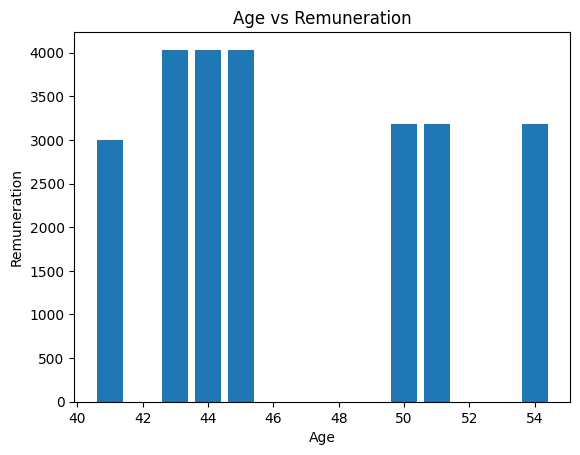

In [165]:
#Plot the chart with age and salary
plt.bar(df_filter.employee_age,df_filter.remuneration)
plt.xlabel('Age')
plt.ylabel('Remuneration')
plt.title('Age vs Remuneration')
plt.show()

This bar chart shows that the age group of 43 to 46 receive the highest remuneration nearly 4000

<Axes: xlabel='count', ylabel='job_location'>

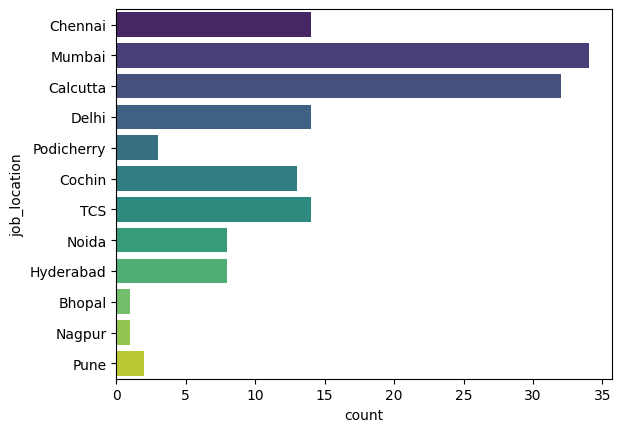

In [166]:
sns.countplot(y='job_location', data=df, palette='viridis', hue='job_location', legend=False)

Mumbai has the highest number of peoples. it is the most popular job location. Calcutta comes in the second most popular job location.From this it is clear that by comparing the other locations it shows that Mumbai have better and more opportunities for the growth of jobs

# DATA ENCODING

In [167]:
#Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding,
#making them suitable for analysis by machine learning algorithms.

df_onehot_encoded = pd.get_dummies(data = df, columns = ["Firm", "job_location","Country"])
print(df_onehot_encoded )

     employee_age  remuneration  employee_gender  Firm_CTS  Firm_Congnizant  \
0            20.0   5312.467742                0     False            False   
1            30.0   5312.467742                0     False            False   
2            35.0   2300.000000                0     False            False   
3            40.0   3000.000000                0     False            False   
4            23.0   4000.000000                0     False            False   
..            ...           ...              ...       ...              ...   
142          22.0   8202.000000                0     False            False   
143          33.0   9024.000000                1     False            False   
145          44.0   4034.000000                1     False            False   
146          33.0   5034.000000                1     False            False   
147          22.0   8202.000000                0     False            False   

     Firm_Infosys  Firm_Infosys Pvt Lmt  Firm_TCS  

# one hot code

In [168]:
from sklearn.preprocessing import OneHotEncoder
cols_to_encode = ["Firm", "job_location","Country"]
new_encoded_cols_names = []
for col in cols_to_encode:
  new_encoded_cols_names += [f"is_{category}" for category in df[col].sort_values().unique().tolist()]
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode]).toarray()
df_encoded = pd.DataFrame(encoded_cols, columns=new_encoded_cols_names)
df_onehot_encoded = df.join(df_encoded)
print(df_onehot_encoded)

                Firm  employee_age  remuneration job_location Country  \
0                TCS          20.0   5312.467742      Chennai   India   
1            Infosys          30.0   5312.467742       Mumbai   India   
2                TCS          35.0   2300.000000     Calcutta   India   
3            Infosys          40.0   3000.000000        Delhi   India   
4                TCS          23.0   4000.000000       Mumbai   India   
..               ...           ...           ...          ...     ...   
142  Infosys Pvt Lmt          22.0   8202.000000       Mumbai   India   
143              TCS          33.0   9024.000000     Calcutta   India   
145          Infosys          44.0   4034.000000        Delhi   India   
146              TCS          33.0   5034.000000       Mumbai   India   
147          Infosys          22.0   8202.000000       Cochin   India   

     employee_gender  is_CTS  is_Congnizant  is_Infosys  is_Infosys Pvt Lmt  \
0                  0     0.0            0.0 

# LABEL ENCODING

In [172]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in df[["Firm","job_location","Country"]]:
    df[i] = label_encoder.fit_transform(df[i])
df

,Firm,employee_age,remuneration,job_location,Country,employee_gender
0,4,20.0,5312.467742,2,0,0
1,2,30.0,5312.467742,6,0,0
2,4,35.0,2300.000000,1,0,0
3,2,40.0,3000.000000,4,0,0
4,4,23.0,4000.000000,6,0,0
...,...,...,...,...,...,...
142,3,22.0,8202.000000,6,0,0
143,4,33.0,9024.000000,1,0,1
145,2,44.0,4034.000000,4,0,1
146,4,33.0,5034.000000,6,0,1


# SCALING

# STANDARDSCALER

In [174]:
from sklearn.preprocessing import StandardScaler


# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data
print(scaled_data.round(2))

[[ 0.99 -1.44  0.01 -0.85  0.   -0.53]
 [-0.24 -0.22  0.01  0.43  0.   -0.53]
 [ 0.99  0.38 -1.27 -1.16  0.   -0.53]
 [-0.24  0.99 -0.97 -0.21  0.   -0.53]
 [ 0.99 -1.08 -0.55  0.43  0.   -0.53]
 [-0.24 -0.17 -0.12 -1.16  0.   -0.53]
 [ 0.99 -0.17  0.3  -0.85  0.    1.87]
 [-0.24 -1.08  0.73  0.43  0.    1.87]
 [ 0.99  0.26  1.15 -1.16  0.    1.87]
 [-1.47  1.6   1.57 -0.21  0.   -0.53]
 [-1.47 -1.08  0.01  0.43  0.   -0.53]
 [-1.47  0.26 -1.78 -1.16  0.   -0.53]
 [-1.47  1.6   0.01 -0.85  0.   -0.53]
 [-1.47 -1.68 -1.72  0.43  0.   -0.53]
 [-0.24  0.99 -0.97 -1.16  0.   -0.53]
 [ 0.99 -1.08 -0.97 -0.21  0.   -0.53]
 [-0.24 -1.08 -0.96  1.38  0.   -0.53]
 [ 0.99  0.26 -0.12 -0.53  0.   -0.53]
 [ 0.99 -1.2   0.01 -0.85  0.   -0.53]
 [-0.24  0.02  0.01  0.43  0.   -0.53]
 [ 0.99  0.63 -0.95 -1.16  0.   -0.53]
 [-0.24  2.21 -0.89 -0.21  0.   -0.53]
 [ 0.99 -1.32 -0.2   0.43  0.   -0.53]
 [-0.24 -0.17  0.23 -0.53  0.   -0.53]
 [ 0.99 -0.17  0.76 -0.85  0.    1.87]
 [-0.24 -1.08  1.55  0.43

# MINMAXSCALER

In [175]:
from sklearn.preprocessing import MinMaxScaler


# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data
print(scaled_data.round(1))

[[0.8 0.1 0.5 0.2 0.  0. ]
 [0.4 0.4 0.5 0.5 0.  0. ]
 [0.8 0.5 0.1 0.1 0.  0. ]
 [0.4 0.6 0.2 0.4 0.  0. ]
 [0.8 0.2 0.3 0.5 0.  0. ]
 [0.4 0.4 0.4 0.1 0.  0. ]
 [0.8 0.4 0.6 0.2 0.  1. ]
 [0.4 0.2 0.7 0.5 0.  1. ]
 [0.8 0.5 0.8 0.1 0.  1. ]
 [0.  0.8 0.9 0.4 0.  0. ]
 [0.  0.2 0.5 0.5 0.  0. ]
 [0.  0.5 0.  0.1 0.  0. ]
 [0.  0.8 0.5 0.2 0.  0. ]
 [0.  0.  0.  0.5 0.  0. ]
 [0.4 0.6 0.2 0.1 0.  0. ]
 [0.8 0.2 0.2 0.4 0.  0. ]
 [0.4 0.2 0.2 0.8 0.  0. ]
 [0.8 0.5 0.4 0.3 0.  0. ]
 [0.8 0.1 0.5 0.2 0.  0. ]
 [0.4 0.4 0.5 0.5 0.  0. ]
 [0.8 0.5 0.2 0.1 0.  0. ]
 [0.4 0.9 0.2 0.4 0.  0. ]
 [0.8 0.1 0.4 0.5 0.  0. ]
 [0.4 0.4 0.5 0.3 0.  0. ]
 [0.8 0.4 0.7 0.2 0.  1. ]
 [0.4 0.2 0.9 0.5 0.  1. ]
 [0.8 0.5 0.8 0.1 0.  1. ]
 [0.  0.8 0.9 0.4 0.  1. ]
 [0.  0.2 1.  0.5 0.  1. ]
 [0.  0.5 0.1 0.3 0.  0. ]
 [0.  0.8 0.7 0.2 0.  0. ]
 [0.  0.1 0.2 0.5 0.  0. ]
 [0.4 0.8 0.3 0.1 0.  0. ]
 [0.8 0.5 0.4 1.  0.  0. ]
 [0.4 0.2 0.8 1.  0.  0. ]
 [0.8 0.5 0.9 1.  0.  1. ]
 [0.8 0.4 0.5 0.7 0.  0. ]
 